<a href="https://colab.research.google.com/github/dkdk22/DL_Ass3/blob/main/DL_Assignment3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Assignment 3
## Group 4
**AUTHORS**:
*   Dario Mameli [dario.mameli@ugent.be]
*   Àngel Masip LLopis [angel.masipllopis@ugent.be]
*   Michele Russo [michele.russo@ugent.be]



This notebook is to be intended as both report and code.

Running on google colab is suggested to make sure all required libraries and packages are present.

#GitHub

Let's clone the repo with the dataset

In [3]:
!git clone https://github.com/dkdk22/DL_Ass3
import sys
# Add the repository to the path
sys.path.insert(1, '/content/DL_Ass3/')

fatal: destination path 'DL_Ass3' already exists and is not an empty directory.


# Setup

Firstly let's setup the workspace

## Pip Installs

In [4]:
# Install the latest version of TensorFlow, which includes Keras (tf.keras)
#!pip install tensorflow --upgrade
!pip install keras --upgrade --quiet
!pip install keras-tuner --upgrade
!pip install PrettyTable
#!pip install sentence-transformers

## Packages

Let's import all the necessary functions and packages

In [5]:
from dl_utils import plot_history
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import regularizers
import matplotlib.gridspec as gridspec
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import nltk
from nltk.corpus import stopwords
import keras_tuner as kt
from keras import backend as backend
from keras.layers import (
    Input,
    Activation,
    BatchNormalization,
    Conv2D,
    Conv2DTranspose,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    MaxPooling2D,
    UpSampling2D
)
from keras.optimizers import SGD, Adam

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import json
import zipfile
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import gdown
import zipfile
import os
from keras import Model, ops
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.ensemble import GradientBoostingClassifier
from nltk.stem import PorterStemmer
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.applications as app
from keras.layers import LSTM, Dense, Embedding, Input, GRU, Bidirectional
from sklearn.preprocessing import StandardScaler
import gc

from prettytable import PrettyTable

import zipfile
from skimage.segmentation import mark_boundaries
from sklearn.preprocessing import minmax_scale
import pickle
#from sentence_transformers import SentenceTransformer
from imblearn.keras import BalancedBatchGenerator
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

#Global variables

In [63]:
SEED = 42
BALANCE_DATASET = True
BATCH_SIZE = 256
TRAIN_BASELINE = False
SEARCH_PARAMETERS = True
TRAIN_MODEL = True
INPUT_SIZE = 100

# Load data

Load the dataset

In [64]:
zip_file_path = 'DL_Ass3/dataset/review_553850.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref: #Extract the file
    zip_ref.extractall()

with open('review_553850.json', 'r') as json_file: # Open the json file
    data = json.load(json_file)

X = []
y = []

for id, review in data["reviews"].items():
    review_text = review["review"]
    funny_votes = review["votes_funny"]
    X.append(review_text)
    y.append(funny_votes)

##Data preprocessing

We are going to do the same preprocessing as in the other notebook. We are going to eliminate stopwords and also we are going to use steeming, tokenize and pad the sentences.


In [65]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Remove stopwords, convert to lowercase and stemming
X_prepro = []
for text in X:
    words = text.split()

    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in filtered_words]
    preprocessed_text = ' '.join(stemmed_tokens)
    X_prepro.append(preprocessed_text)

# Remove the reviews with 0 words
X_filtered = []
y_filtered = []
for review, label in zip(X_prepro, y):
    if len(review.split()) > 0:
        X_filtered.append(review)
        y_filtered.append(label)
print("Length of the dataset: "+str(len(X_filtered)))

# Tokenize
num_words=10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_filtered)
X_sequences = tokenizer.texts_to_sequences(X_filtered)

# Initialize variables to store information about the longest sequence
max_length = 0
max_index = -1

# Iterate through the list of sequences to have the longes sequence
for i, sequence in enumerate(X_sequences):
    length = len(sequence)
    # Update max_length and max_index if the current sequence is longer
    if length > max_length:
        max_length = length
        max_index = i

# Retrieve the longest sequence
longest_sequence = X_sequences[max_index]

# Print the longest sequence
print("The longest sequence:")
print(longest_sequence)
print(len(longest_sequence))

# Padding
max_sequence_length = len(longest_sequence)
padded_sequences = pad_sequences(X_sequences, maxlen=max_sequence_length)

# Convert to np arrays
scaler = StandardScaler()
normalized_data = scaler.fit_transform(padded_sequences)
X = np.array(normalized_data)
print(X.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Length of the dataset: 188843
The longest sequence:
[169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 154, 169, 15

Delete variables to save memory

In [66]:
del stop_words
del stemmer
del X_prepro
del text
del words
del filtered_words
del stemmed_tokens
del preprocessed_text
del review
del num_words
del tokenizer
del X_sequences
del max_length
del max_index
del sequence
del longest_sequence
del padded_sequences
del scaler
del normalized_data
gc.collect()

0

#Binary classification problem

We can see that this is a really difficoult task to learn because most of the reviews have 0 funny_votes and some of them have a really high value of funny_votes. That's why we are going to change the approach and convert the problem to a binary classification problem, that should be easier to learn to our model.

## Data conversion

We are going to convert it by fixing an number of funny_votes N, treating a review as funny or not funny depending on whether it has more or fewer votes than N. In our case N is going to be 1 because of the unbalancement of the dataset.

In [67]:
y = [0 if num == 0 else 1 for num in y_filtered]
y = np.array(y)
del y_filtered
gc.collect()

0

Now let's look at the dataset for possible imbalances

In [68]:
def check_for_imbalance(X, y):
  #Assuming y is a numpy array containing labels
  #and X is a numpy array containing features
  #Indices where y equals 0
  indices_y0 = np.where(y == 0)[0]
  size_X_y0 = len(indices_y0)

  #Indices where y equals 1
  indices_y1 = np.where(y == 1)[0]
  size_X_y1 = len(indices_y1)

  print("Size of X when y = 0:", size_X_y0)
  print("Size of X when y = 1:", size_X_y1)

In [69]:
check_for_imbalance(X, y)

Size of X when y = 0: 182448
Size of X when y = 1: 6395


Seeing that the dataset is imbalanced, let's define a function to balance out the classes, such that we have an equal number of samples for each class in the dataset.

In [70]:
def balance_classes(X, y):
    # Find indices of examples for each class
    indices_class_0 = np.where(y == 0)[0]
    indices_class_1 = np.where(y == 1)[0]

    # Calculate the number of examples in each class
    num_class_0 = len(indices_class_0)
    num_class_1 = len(indices_class_1)

    # Randomly select a subset of examples from class 0 to match the number of examples in class 1
    if num_class_0 > num_class_1:
        # Randomly shuffle indices of class 0 examples
        np.random.shuffle(indices_class_0)
        # Keep only enough examples from class 0 to match the number of examples in class 1
        indices_class_0 = indices_class_0[:num_class_1]
    elif num_class_1 > num_class_0:
        # Randomly shuffle indices of class 1 examples
        np.random.shuffle(indices_class_1)
        # Keep only enough examples from class 1 to match the number of examples in class 0
        indices_class_1 = indices_class_1[:num_class_0]

    # Combine the balanced indices
    balanced_indices = np.concatenate([indices_class_0, indices_class_1])

    # Shuffle the combined indices
    np.random.shuffle(balanced_indices)

    # Return the balanced subset of data
    return X[balanced_indices], y[balanced_indices]


Balance the dataset if requested

In [71]:
if BALANCE_DATASET:
  balanced_X_train, balanced_y_train = balance_classes(X, y)
  print("Before PCA", balanced_X_train.shape)

  # Reduce dimensionality
  # Apply PCA to reduce sequence length to INPUT_SIZE
  pca = PCA(n_components=INPUT_SIZE)
  balanced_X_train = pca.fit_transform(balanced_X_train)
  print("After PCA", balanced_X_train.shape)

  X_train, X_test, y_train, y_test = train_test_split(balanced_X_train, balanced_y_train, test_size=0.2, shuffle=True, random_state=SEED, stratify=balanced_y_train)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True,  random_state=SEED, stratify=y_train)

else:
  # Take only 10% of the data otherwise training and evaluation would be too slow.
  _, X_train, _, y_train = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=SEED, stratify=y)

  # Reduce dimensionality
  # Apply PCA to reduce sequence length to INPUT_SIZE
  pca = PCA(n_components=INPUT_SIZE)
  X_train = pca.fit_transform(X_train)
  print("After PCA", X_train.shape)

  X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=SEED, stratify=y_train)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True,  random_state=SEED, stratify=y_train)

Before PCA (12790, 1600)
After PCA (12790, 100)


In [72]:
check_for_imbalance(X_train, y_train)

Size of X when y = 0: 4092
Size of X when y = 1: 4093


In [73]:
del y
del X
gc.collect()

0

## Models Building

### Baseline Model

In [74]:
baseline_model = GradientBoostingClassifier()

### Our Model

Define the hypermodel

In [92]:
class HyperModelBuilderBinary(kt.HyperModel):
    def __init__(self, seq_length, loss_function, max_features):
        self.seq_length = int(seq_length)
        self.loss_function = loss_function
        self.max_features = max_features

    def build_lstm_model(self, hp):
        model = Sequential()
        model.add(Input(shape=(self.seq_length,)))
        model.add(Embedding(input_dim=self.max_features, output_dim=128))
        model.add(LSTM(units=hp.Int('units', min_value=64, max_value=256, step=32), #https://keras.io/api/layers/recurrent_layers/lstm/
                       dropout=hp.Float('dropout', min_value=0.2, max_value=0.4, step=0.2),
                       recurrent_dropout=hp.Float('dropout', min_value=0.2, max_value=0.4, step=0.2), #reduce two dropouts
                       input_shape=(self.seq_length, 1)))
        model.add(Dense(1, activation="sigmoid"))
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                      loss=self.loss_function,
                      metrics=["accuracy"])
        return model

    def build_bidirectional_lstm_model(self, hp):
        inputs = Input(shape=(self.seq_length,))
        x = Embedding(input_dim=self.max_features, output_dim=128)(inputs)
        x = Bidirectional(LSTM(units=hp.Int('units', min_value=64, max_value=256, step=32),
                               dropout=hp.Float('dropout', min_value=0.2, max_value=0.4, step=0.2),
                               recurrent_dropout=hp.Float('dropout', min_value=0.2, max_value=0.4, step=0.2),
                               return_sequences = True),
                          input_shape=(self.seq_length, 1))(inputs)
        x = Bidirectional(LSTM(units=hp.Int('units', min_value=64, max_value=256, step=32),
                               dropout=hp.Float('dropout', min_value=0.2, max_value=0.4, step=0.2),
                               recurrent_dropout=hp.Float('dropout', min_value=0.2, max_value=0.4, step=0.2)),
                          input_shape=(self.seq_length, 1))(x)

        outputs = Dense(1, activation="sigmoid")(x)
        model = keras.Model(inputs, outputs)
        model.summary()

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                      loss=self.loss_function,
                      metrics=["accuracy"])
        return model


    def build_gru_model(self, hp):
        model = Sequential()
        model.add(Input(shape=(self.seq_length,)))
        model.add(Embedding(input_dim=self.max_features, output_dim=128))
        model.add(GRU(units=hp.Int('units', min_value=64, max_value=256, step=32),   #https://keras.io/api/layers/recurrent_layers/gru/
                      dropout=hp.Float('dropout', min_value=0.1, max_value=0.4, step=0.1),
                      recurrent_dropout=hp.Float('dropout', min_value=0.1, max_value=0.4, step=0.1),
                      input_shape=(self.seq_length, 1)))
        model.add(Dense(1, activation="sigmoid"))

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                      loss=self.loss_function,
                      metrics=["accuracy"])
        return model

    def build_cnn_model(self, hp):
        model = Sequential()
        model.add(Input(shape=(self.seq_length,)))
        model.add(Embedding(input_dim=self.max_features, output_dim=128))
        model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.4, step=0.1)))
        model.add(keras.layers.Conv1D(hp.Int('units', min_value=64, max_value=256, step=32),
                         3, activation="relu", strides=1, padding="same"))
        model.add(keras.layers.GlobalMaxPooling1D())
        model.add(Dense(128, activation="relu"))
        model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.4, step=0.1)))
        model.add(Dense(1, activation="sigmoid"))

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                              loss=self.loss_function,
                              metrics=["accuracy"])
        return model

    def build_model(self,hp):
        model_name = hp.Choice('model_name', values=['CNN'])
        if model_name == 'LSTM':
            return self.build_lstm_model(hp)
        elif model_name == 'BidirectionalLSTM':
            return self.build_bidirectional_lstm_model(hp)
        elif model_name == 'GRU':
            return self.build_gru_model(hp)
        elif model_name == 'CNN':
            return self.build_cnn_model(hp)

    def fit(self, hp, model, *args, **kwargs):
        training_generator = BalancedBatchGenerator(
          X_train, y_train, batch_size=BATCH_SIZE, random_state=SEED, shuffle=True
        )
        if not BALANCE_DATASET:
          weight_for_0 = 1. / size_X_y0
          weight_for_1 = 1. / size_X_y1
          class_weight = {0: weight_for_0, 1: weight_for_1}
          return model.fit(training_generator, validation_data=(X_val, y_val), class_weight=class_weight)
        else:
          return model.fit(training_generator, validation_data=(X_val, y_val))

Define the hypertuner

In [97]:
loss = keras.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="sum_over_batch_size",
    name="binary_crossentropy",
)

# Define hyperparameters for the tuner
hypermodel_builder = HyperModelBuilderBinary(seq_length=INPUT_SIZE,
                                       loss_function=loss, max_features=10000)

# Initialize tuner
tuner = kt.BayesianOptimization(hypermodel_builder.build_model,
                        objective='val_loss',
                        max_trials=10,
                        executions_per_trial=1, # The documentation says that makes things faster
                        overwrite=True,
                        max_consecutive_failed_trials=5,
                        directory='tuner_results',
                        project_name='classification_tuning')

# Summarize the search space
tuner.search_space_summary()

Search space summary
Default search space size: 4
model_name (Choice)
{'default': 'CNN', 'conditions': [], 'values': ['CNN'], 'ordered': False}
dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.4, 'step': 0.1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05], 'ordered': True}


# Training

## Baseline training

In [98]:
if TRAIN_BASELINE:
  baseline_model.fit(X_train, y_train)
  joblib.dump(baseline_model, '/content/DL_Ass3/models/baseline_model_cla.pkl')
else:
  baseline_model = joblib.load('/content/DL_Ass3/models/baseline_model_cla.pkl')

## Our model's training

### Search
Search the parameters for our model

In [99]:
if SEARCH_PARAMETERS:
  # Early stop to prevent overfitting
  stop_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=4,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
  )

  # Perform hyperparameter search
  tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=BATCH_SIZE, callbacks=[stop_early])
  # Get the best hyperparameters
  best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
  # Define the file name where you want to save the hyperparameters
  file_name = "/content/DL_Ass3/parameters/best_hps_cla.json"
  #Save the hp
  with open("/content/DL_Ass3/parameters/best_hps_cla.pkl", "wb") as f:
    pickle.dump(best_hps, f)

Trial 10 Complete [00h 00m 13s]
val_loss: 0.6928866505622864

Best val_loss So Far: 0.6874797940254211
Total elapsed time: 00h 04m 12s


### Train
Train our model or load the weights if offline search

{'model_name': 'CNN', 'dropout': 0.1, 'units': 96, 'learning_rate': 0.001}
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.5046 - loss: 0.6926 - val_accuracy: 0.4998 - val_loss: 0.6882
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5142 - loss: 0.6896 - val_accuracy: 0.5330 - val_loss: 0.6868
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5326 - loss: 0.6877 - val_accuracy: 0.5442 - val_loss: 0.6864
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5340 - loss: 0.6885 - val_accuracy: 0.5520 - val_loss: 0.6860
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5409 - loss: 0.6882 - val_accuracy: 0.5520 - val_loss: 0.6859
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5465 - loss: 0.6852 - val_accuracy: 0.5520 - val_loss: 0.6861
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5396 - loss: 0.6881 - val_accuracy: 0.5520 - val_loss: 0.6856
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

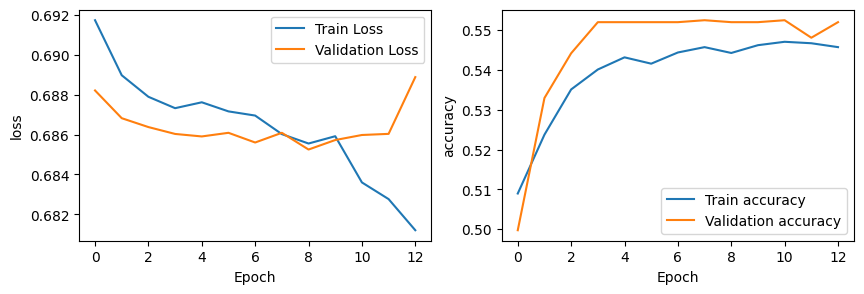

In [107]:
# Read the best parameters
with open("/content/DL_Ass3/parameters/best_hps_cla.pkl", "rb") as f:
  best_hps = pickle.load(f)

# Build the model
best_model = tuner.hypermodel.build(best_hps)

if TRAIN_MODEL:
  # Early stop to prevent overfitting
  stop_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=4,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
  )

  # Fit the model
  history = best_model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[stop_early])
  # Save the model
  best_model.save_weights('/content/DL_Ass3/models/best_model_cla.weights.h5')
  plot_history(history)

else:
  best_model.load_weights('/content/DL_Ass3/models/best_model_cla.weights.h5')


# Evaluation

In [101]:
def compute_class_accuracies(X_data, y_data, model):
  # The predicted probabilities for each class
  y_pred_probs = model.predict(X_data)

  # The corresponding predicted labels
  y_pred_labels = np.argmax(y_pred_probs, axis=0)

  # The corresponding true labels
  y_true_labels = np.argmax(y_data, axis=0)

  # Compute confusion matrix
  cm = confusion_matrix(y_true_labels, y_pred_labels)

  # Compute accuracies and weights for each class
  class_accuracies = []
  for class_label in range(len(cm)):
      class_accuracy = cm[class_label, class_label] / np.sum(cm[class_label, :])
      class_accuracies.append(class_accuracy)

  # Print the classification report
  print(classification_report(y_true_labels, y_pred_labels))

  return class_accuracies

## Baseline evaluation

In [102]:
y_pred = baseline_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
  # Print the classification report
print(classification_report(y_test, y_pred))

ValueError: X has 100 features, but GradientBoostingClassifier is expecting 1600 features as input.

We can see that the model is only predicting 0

## Our model's evaluation

In [108]:
y_pred = best_model.predict(X_test)
#print(y_pred)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
y_pred_binary=np.squeeze(y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)
  # Print the classification report
print(classification_report(y_test, y_pred_binary))

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 0.5324472243940579
              precision    recall  f1-score   support

           0       0.52      0.77      0.62      1279
           1       0.56      0.30      0.39      1279

    accuracy                           0.53      2558
   macro avg       0.54      0.53      0.51      2558
weighted avg       0.54      0.53      0.51      2558

